# Modificando o CRS dos Arquivos do Projeto

### Fonte dos Dados

https://www.spatialreference.org/
https://www.lapig.iesa.ufg.br/lapig/cursos_online/gvsig/a_projeo_utm_no_brasil.html

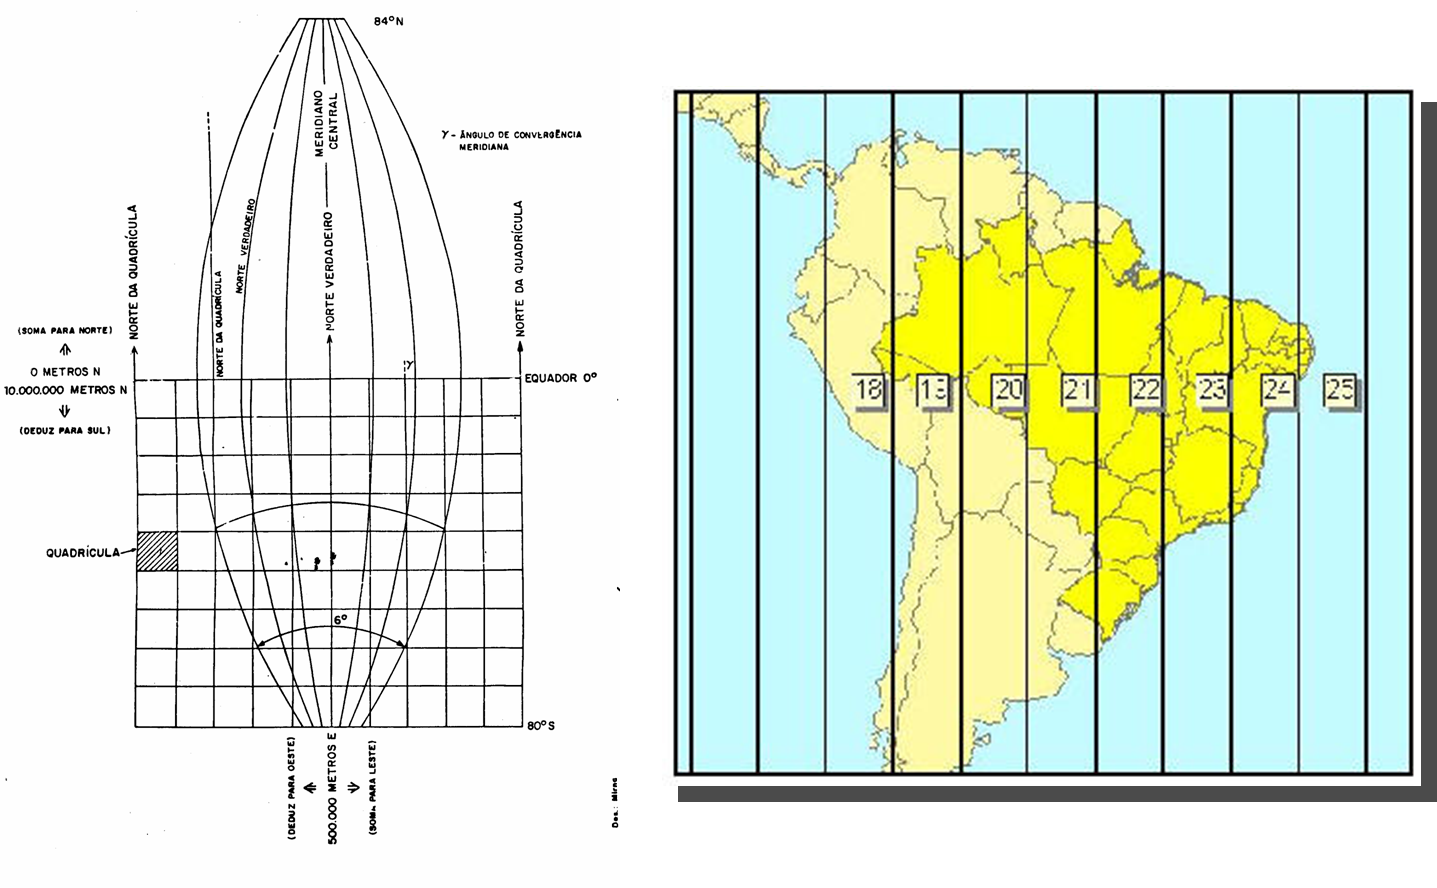

In [6]:
from IPython.display import Image
Image("../01.Dados/Imagens/UTM_Brasil.png")

### Importando os dados

In [7]:
import geopandas as gpd

In [8]:
rj = gpd.read_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

In [9]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,(POLYGON ((-43.1237647832704 -22.8071200194477...


### Identificando o tipo de crs dos arquivos importados

In [12]:
# Identificando o tipo de crs do shapefile da cidade do Rio de Janeiro
rj.crs

{'proj': 'longlat', 'ellps': 'GRS80', 'no_defs': True}

In [14]:
# Identificando o tipo de crs dos dados de plotagem
geo_dados.crs

{'init': 'epsg:4326'}

### Igualando os CRS 

In [15]:
# Deixando todos os dados com o mesmo crs
# note que em +units=m (o 'm' significa que é para tratar em metros, caso queira mudar para km, digite km)
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')


In [17]:
# Deixando todos os dados com o mesmo crs
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs ')

In [19]:
# Verificando o crs de rj e geo_dados
rj.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs '

In [20]:
geo_dados.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs '

### Salvando arquivos com o CRS igualado

In [21]:
rj.to_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

### Testando o  arquivo

In [22]:
rj_novo = gpd.read_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')

In [24]:
# note que mudou o tipo da geometria.
rj_novo

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,(POLYGON ((692.5758012880638 7476.609203982483...


In [25]:
rj_novo

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,(POLYGON ((692.5758012880638 7476.609203982483...
